<style type="text/css">
table td{
border:none;
}
</style>

<table>
    <tr>
        <td width=15%><img src="../img/logoIGE_Color_Light.jpg"></img></td>
        <td>
            <center>
                <h1>Machine Learning for prediciting RX localization</h1> <br>
                May - July 2022 <br>
                IGE internship
            </center>
            Renan MANCEAUX <br>
            Supervisor :<br>
            Thomas CHAUVE
        </td>
        <td width=20%><img src="../img/logo_UGA_imag.png"></img></td>
    </tr>
</table>

<center><h1> Machine learning : Testing Models </h1></center>

----------------------------

<center><h1> Random forest classification</h1></center>

In [36]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../")
import utils

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


## Loading data

In [2]:
CI02 = utils.load_data("../data/for_learning/CI02.npy")
CI04 = utils.load_data("../data/for_learning/CI04.npy")
CI06 = utils.load_data("../data/for_learning/CI06.npy")
CI09 = utils.load_data("../data/for_learning/CI09.npy")
CI21 = utils.load_data("../data/for_learning/CI21.npy")

# Classification with learning on CI02

## Learning and prediction on CI02 80%/20%

In [3]:
data = CI02

### Spliting dataset to train/test

In [4]:
X = data[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y = data['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_set random 20%

### Apply random forest classifier

In [5]:
clf = RandomForestClassifier(max_depth=10)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### Evaluation of the prediction

In [6]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.961890243902439
Precision: 0.9402173913043478
Recall: 0.1521547933157432


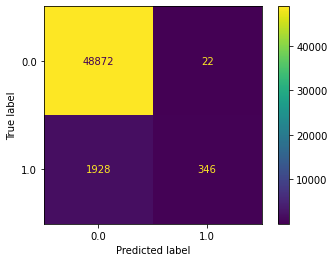

In [7]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred) 
plt.show()

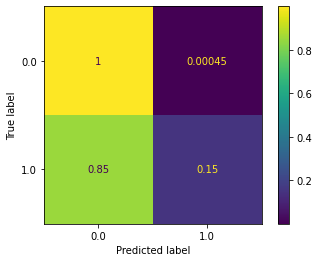

In [8]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize="true")  
plt.show()

### Projection of test set

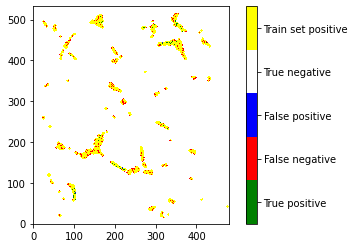

In [9]:
im_shape = np.shape(np.load("../data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_test,im_shape,y_train)

## Prediction on CI02

In [10]:
X_val = CI02[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y_val = CI02['Y'] 

In [11]:
y_pred = clf.predict(X_val)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))

Accuracy: 0.9629494996873046
Precision: 0.9763056092843327
Recall: 0.17634727923836144


### Evaluation of the prediction

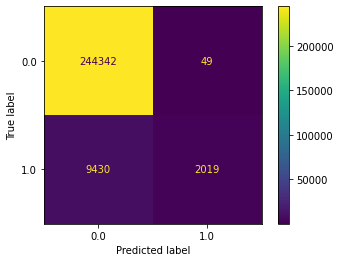

In [13]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)  
plt.show()

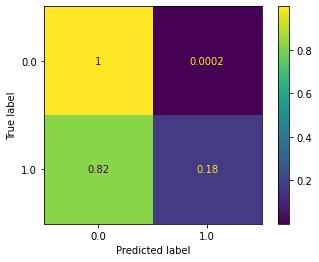

In [14]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize="true")  
plt.show()

### Projection of train/test set

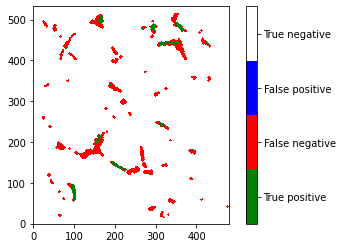

In [15]:
im_shape = np.shape(np.load("../data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

## Prediction on CI04

In [16]:
X_val = CI04[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y_val = CI04['Y'] 

In [17]:
y_pred = clf.predict(X_val)

### Evaluation of the prediction

In [18]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))

Accuracy: 0.8976324720453224
Precision: 0.3402061855670103
Recall: 0.0010908009123062176


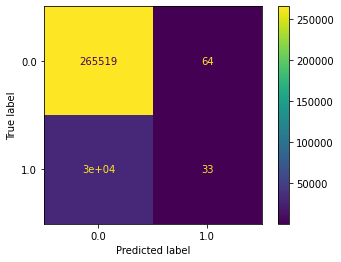

In [19]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)  
plt.show()

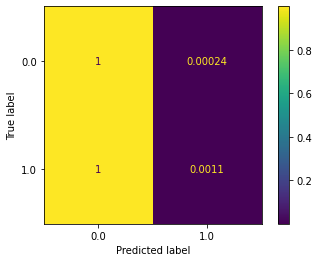

In [20]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize="true")  
plt.show()

### Projection of validation set

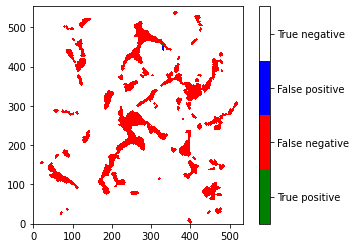

In [21]:
im_shape = np.shape(np.load("../data/for_learning/CI04.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

-------------------------------------

# Classification with learning on sub dataset of CI02 
Selection determinated by :

&emsp;$dist2GB <25 \cap dist2TJ < 60$

### Selection of the sub dataset

In [22]:
sub_data = data[(data["dist2GB"] < 25) & (data["dist2TJ"] < 60)]

### Spliting dataset to Train/Test

In [23]:
X = sub_data[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y = sub_data['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_set random 20%

### Apply random forest

In [24]:
clf = RandomForestClassifier(max_depth=10)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### Evaluation of the prediction

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9548576805457539
Precision: 0.9483204134366925
Recall: 0.16195939982347748


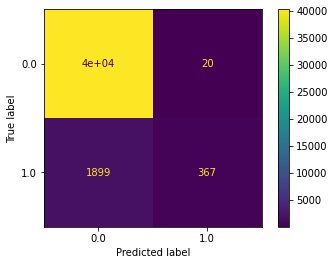

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)  
plt.show()

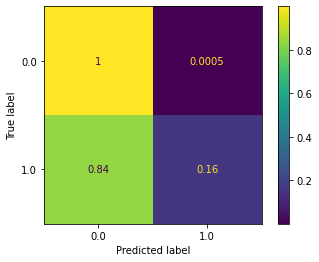

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize="true")  
plt.show()

-----------------------------

# Classification with learning on another sub dataset of CI02 
Selection determinated by :

&emsp; $2 \times dist2GB + dist2TJ < 60$

### Selection of the sub dataset

In [28]:
sub_data = data[(2*data["dist2GB"] + data["dist2TJ"] < 60)]

### Spliting dataset to Train/Test

In [29]:
X = sub_data[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y = sub_data['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_set random 20%

### Apply random forest

In [30]:
clf = RandomForestClassifier(max_depth=10)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### Evaluation of the prediction

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9428057773173258
Precision: 0.9535962877030162
Recall: 0.18121693121693122


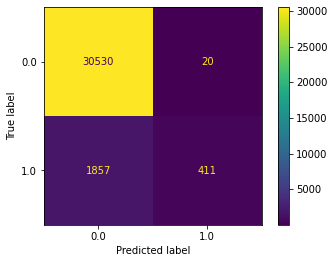

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)  
plt.show()

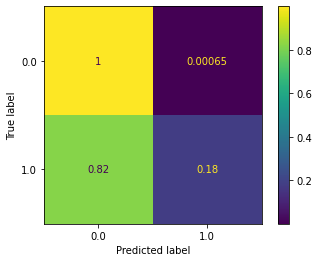

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize='true')  
plt.show()